# Simple Linear Regression

The goal of this project was to build a linear regression model from the ground up using numpy.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

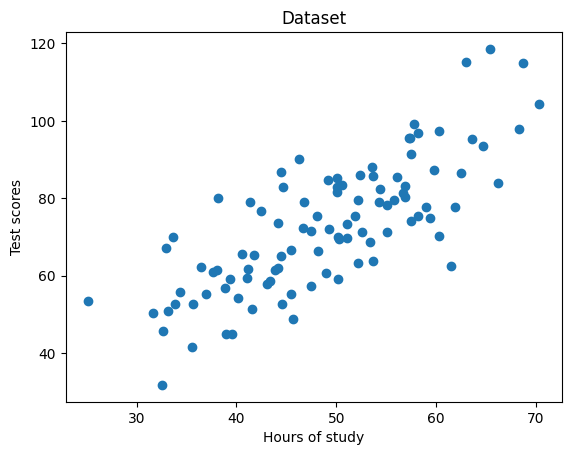

In [2]:
points = np.genfromtxt('data.csv', delimiter=',')

#Extract columns
x = np.array(points[:,0])
y = np.array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

In [3]:
#hyperparamters
learning_rate = 0.0001
initial_bias = 0
initial_linear_coef = 0
num_iterations = 10

#### Define cost function
$$
\text{MSE}(y, \hat{y}) = \frac{\sum_{i=0}^{N - 1} (y_i - \hat{y}_i)^2}{N}
$$


In [4]:
def compute_cost(bias, linear_coef, points):
    """TODO: implement MSE"""
    total_cost = 0
    num_of_points = len(points)
    
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (linear_coef * x + bias)) ** 2
        
    return total_cost / num_of_points

#### Define Gradient Descent functions
$$
\frac{d}{dx}(x^2) = 2x
$$
$$
h(x) = (f \circ g)(x) = f(g(x))
$$
$$
h'(x) = f'(g(x)) \cdot g'(x)
$$
$$
L(a,b) = \frac{1}{N} \sum_{i=1}^{N} (y_i - (ax_i + b))^2
$$

$$
\frac{\partial L}{\partial a} = \frac{1}{N} \sum_{i=1}^{N} 2(y_i - (ax_i + b)) \cdot (-x_i) = -\frac{2}{N} \sum_{i=1}^{N} x_i(y_i - (ax_i + b))
$$
$$
\frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} 2(y_i - (ax_i + b)) \cdot (-1) = -\frac{2}{N} \sum_{i=1}^{N} (y_i - (ax_i + b))
$$

In [5]:
def step_gradient(b_current, a_current, points, learning_rate):
    a_accumulated_gradient = 0
    b_accumulated_gradient = 0
    N = float(len(points))
    """TODO: implement update of params using gradient descent"""
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        a_accumulated_gradient -= (2 / N) * x * (y - (a_current * x + b_current))
        b_accumulated_gradient -= (2 / N) * (y - (a_current * x + b_current))
    a_updated = a_current - learning_rate * a_accumulated_gradient
    b_updated = b_current - learning_rate * b_accumulated_gradient
    return b_updated, a_updated

In [6]:
def gradient_descent_runner(points, starting_bias, starting_linear_coefs, learning_rate, num_iterations):
    b = starting_bias
    a = starting_linear_coefs
    costs = []

    for i in range(num_iterations):
        """TODO: implement training loop"""
        costs.append(compute_cost(b, a, points))
        b, a = step_gradient(b, a, np.array(points), learning_rate)

    return [b, a, costs]

#### Run gradient_descent_runner() to get optimized parameters b and m

In [7]:
b, a, cost_graph = gradient_descent_runner(points, initial_bias, initial_linear_coef, learning_rate, num_iterations)


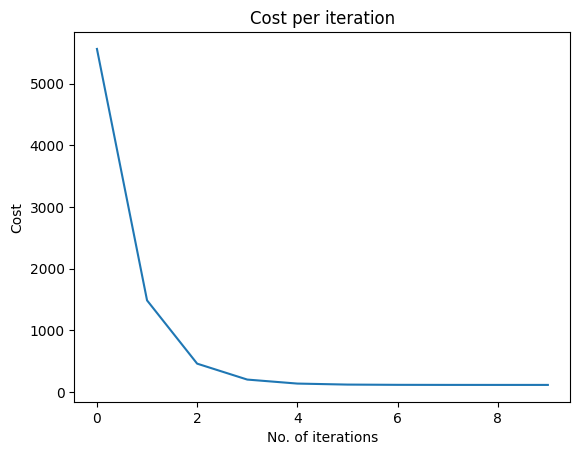

In [8]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

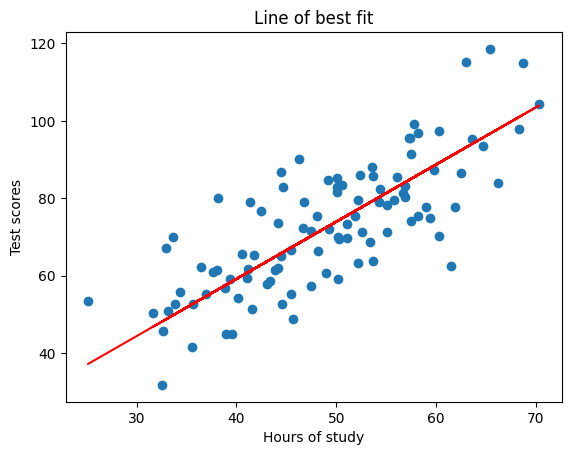

In [9]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = a * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()